## Assignment_KNN model to classify the different types of Glass

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

C:\Users\PRASAD\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Import Dataset
glass_df = pd.read_csv('glass.csv')
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Performing EDA

In [3]:
# Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.
glass_df.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [4]:
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
# Descriptive Analysis
glass_df.shape

(214, 10)

In [6]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
# Cheking for duplicates
glass_df[glass_df.duplicated()].shape

(1, 10)

In [8]:
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
glass_df.drop_duplicates(inplace=True)

In [10]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
glass_df["Type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [12]:
glass_df['Type'].value_counts().sort_index(ascending=True)

1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

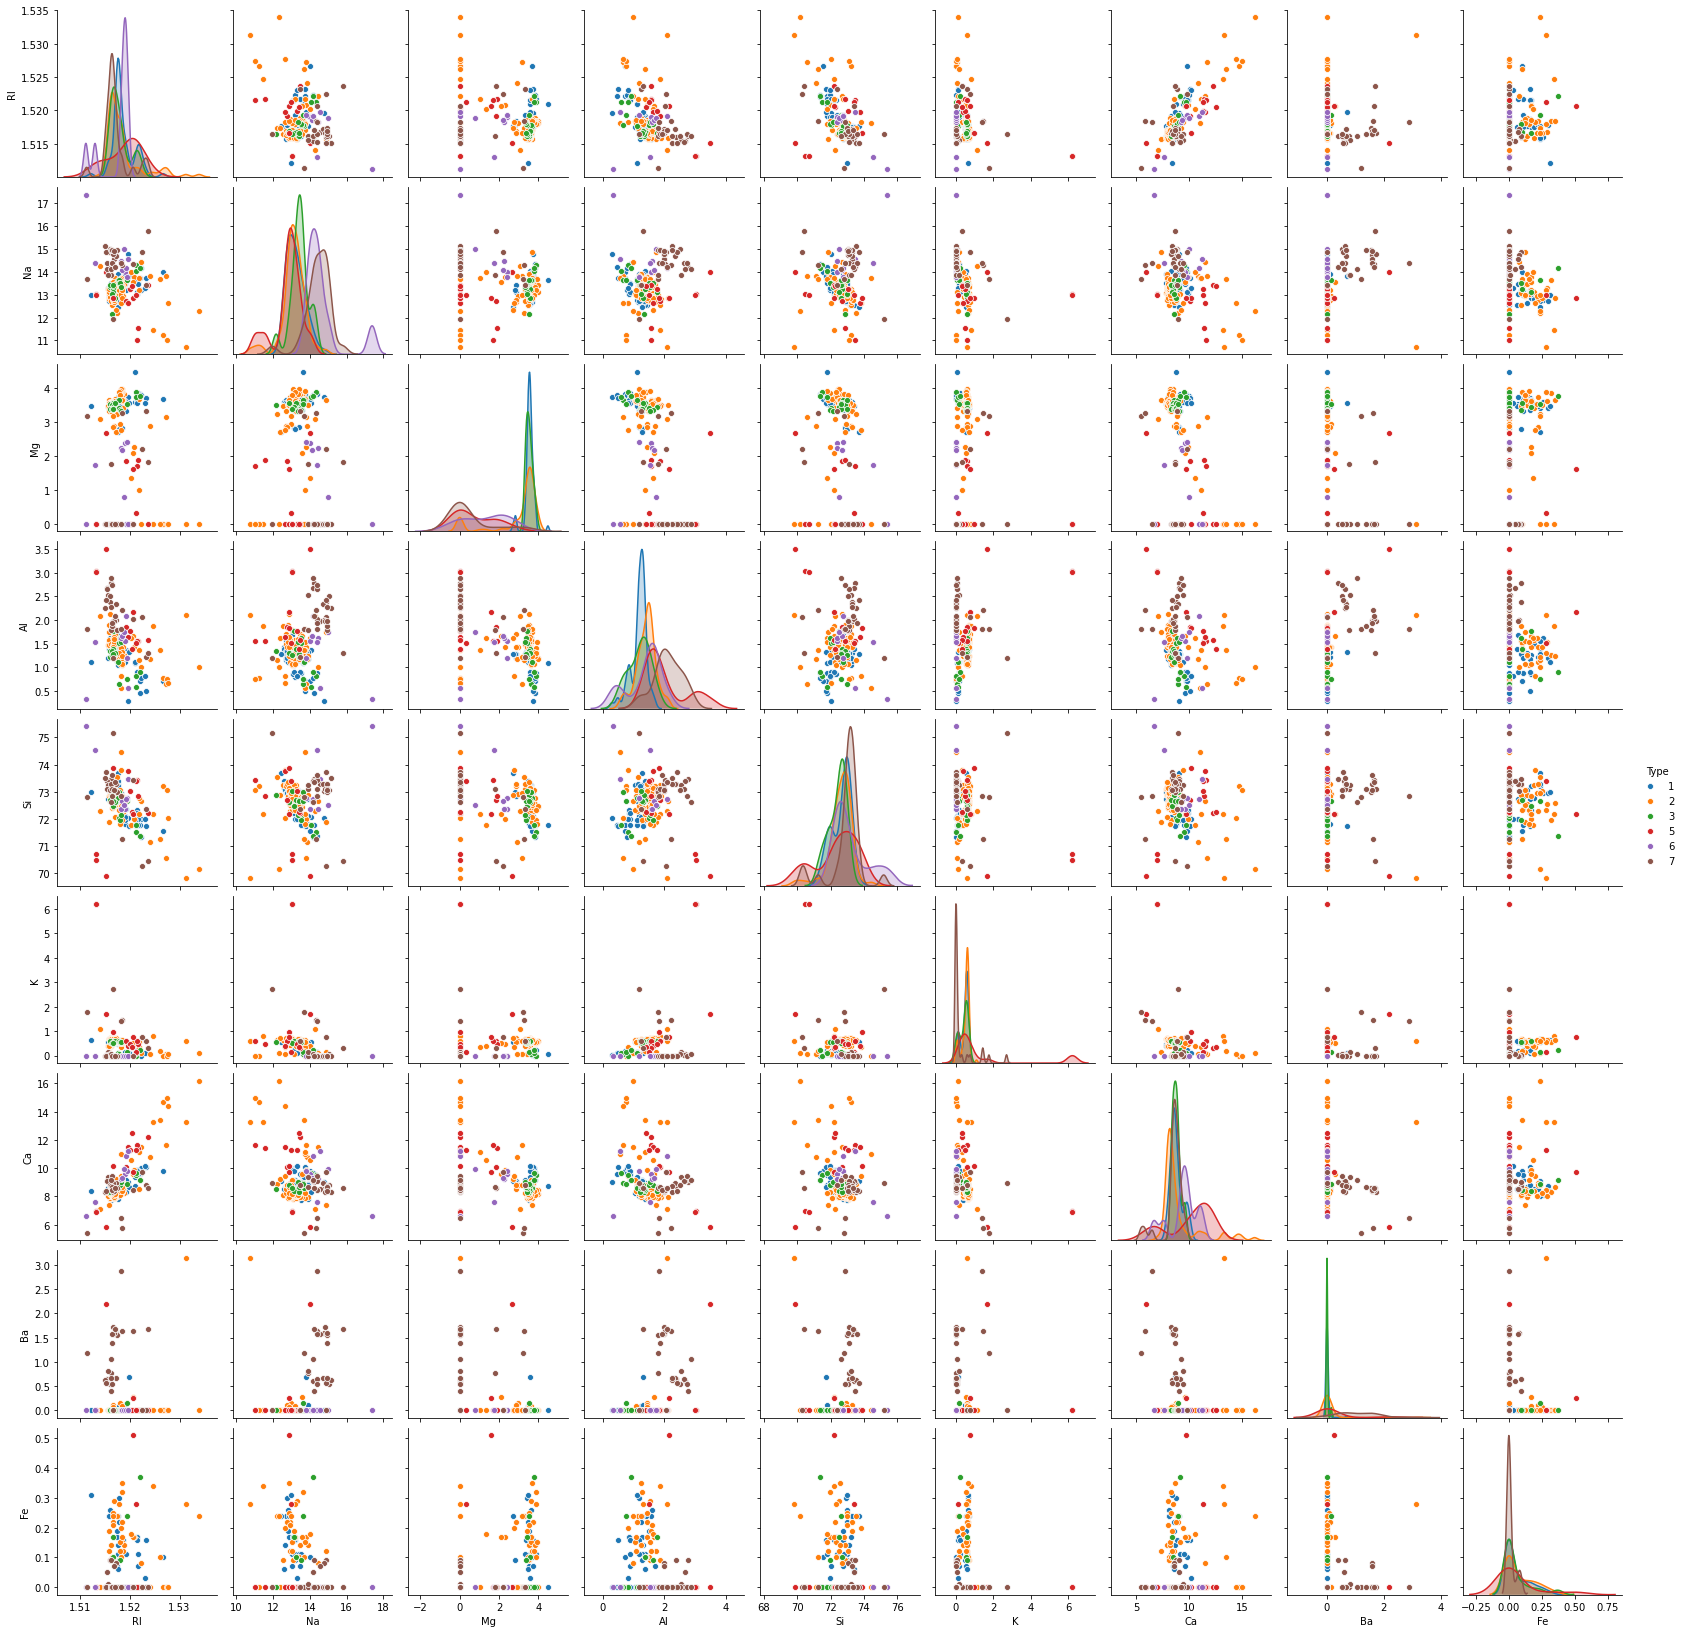

In [13]:
# Visualization
sns.pairplot(glass_df, hue='Type')

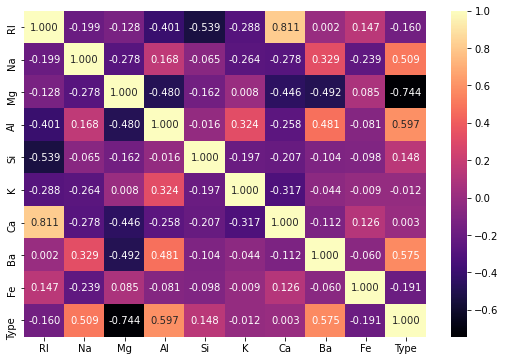

In [14]:
plt.figure(figsize = (9, 6));
sns.heatmap(glass_df.corr(), cmap='magma', annot=True, fmt='.3f')
plt.show()

### KNN Model Building

In [15]:
X = glass_df.iloc[:, 0:9]
Y = glass_df.iloc[:, -1]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [16]:
model = KNeighborsClassifier(n_neighbors = 12)
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)

In [17]:
kfold = KFold(n_splits=8)
results = cross_val_score(model, X, Y, cv = kfold)
results

array([0.51851852, 0.77777778, 0.88888889, 0.2962963 , 0.40740741,
       0.19230769, 0.        , 0.        ])

In [18]:
results.mean()

0.3851495726495726

### Grid Search for Algorithm Tuning

In [19]:
n_neighbors = list(range(1,33))
parameters = {'n_neighbors' : n_neighbors}

In [20]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [21]:
print(grid.best_score_)
print(grid.best_params_)

0.64828349944629
{'n_neighbors': 1}


#### Visualizing the CV results

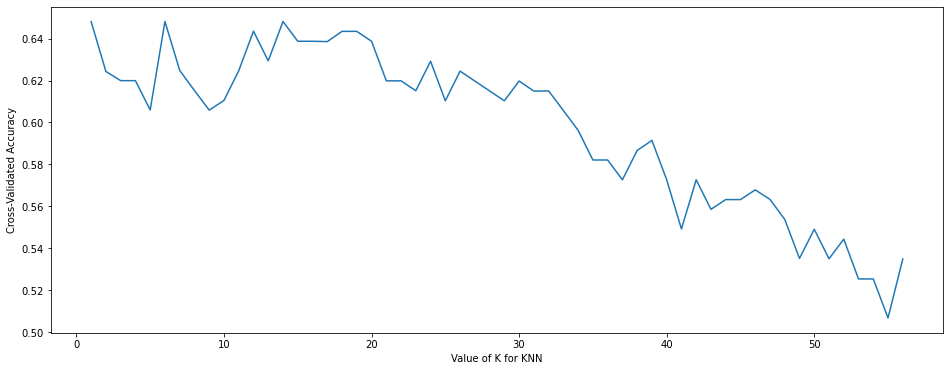

In [22]:
k_range = range(1, 57)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
    
# plot to see clearly
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [23]:
k_scores

[0.6480607966457023,
 0.6243011879804332,
 0.6199336128581412,
 0.6199336128581412,
 0.6059573724668064,
 0.6481481481481481,
 0.6248252969951084,
 0.6152166317260657,
 0.6058700209643605,
 0.6104996505939903,
 0.6246505939902166,
 0.6435185185185185,
 0.6293675751222921,
 0.6481481481481481,
 0.6387141858839971,
 0.6387141858839971,
 0.6385394828791054,
 0.6434311670160726,
 0.6434311670160726,
 0.6387141858839971,
 0.6198462613556952,
 0.6198462613556953,
 0.6151292802236199,
 0.6291928721174004,
 0.6103249475890985,
 0.624475890985325,
 0.6197589098532494,
 0.615041928721174,
 0.6103249475890985,
 0.6197589098532494,
 0.6149545772187281,
 0.6150419287211739,
 0.6056953179594688,
 0.5962613556953179,
 0.5821104122990914,
 0.5821104122990914,
 0.5726764500349406,
 0.5866526904262753,
 0.5914570230607966,
 0.5726764500349406,
 0.549266247379455,
 0.5726764500349406,
 0.55861285814116,
 0.5632424877707896,
 0.5632424877707897,
 0.5678721174004193,
 0.5633298392732354,
 0.553808525506638

In [24]:
glass_accuracy = pd.DataFrame({'Value of k' : range(1,57),
                            'Accuracy' : k_scores})
glass_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
5,6,0.648148
13,14,0.648148
0,1,0.648061
11,12,0.643519
18,19,0.643431
17,18,0.643431
19,20,0.638714
15,16,0.638714
14,15,0.638714
16,17,0.638539
